# Using Machine Learning to Predict Vitals in the MUSC CV-ICU

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
#read in the dataset
df = pd.read_csv('/home/suttoshe/serie.csv')

In [2]:
df = df.head(10000)
df = df.transpose()

## One Patient


In [12]:
one_pat = df.iloc[1]
one_pat

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
9995     97.0
9996     97.0
9997     97.0
9998     99.0
9999     98.0
Name: 0038f380-6875-11ec-b602-005056bad283, Length: 10000, dtype: float64

In [5]:
#works with df or series
model = ARIMA(one_pat.transpose(),order=(0,0,12))
model_fit = model.fit()

In [6]:
model_fit.mae #mean abs error

0.8383657819271664

## Three Patients

In [25]:
mae_list = []
i=1
while i<4:
    model = ARIMA(df.iloc[i].transpose(),order=(0,0,12))
    model_fit = model.fit()
    mae_err = model_fit.mae
    mae_list.append(mae_err)
    i=i+1

In [31]:
model_fit.forecast(720) #runs on the most recent patient

10000    99.966317
10001    99.930925
10002    99.896410
10003    99.863656
10004    99.834675
           ...    
10715    99.732559
10716    99.732559
10717    99.732559
10718    99.732559
10719    99.732559
Name: predicted_mean, Length: 720, dtype: float64

In [35]:
model_fit.resid

0       0.267441
1       0.023527
2       0.027825
3       0.030482
4       0.032681
          ...   
9995    0.033683
9996    0.033683
9997    0.033683
9998    0.033683
9999    0.033683
Length: 10000, dtype: float64

<Figure size 64800x36000 with 0 Axes>

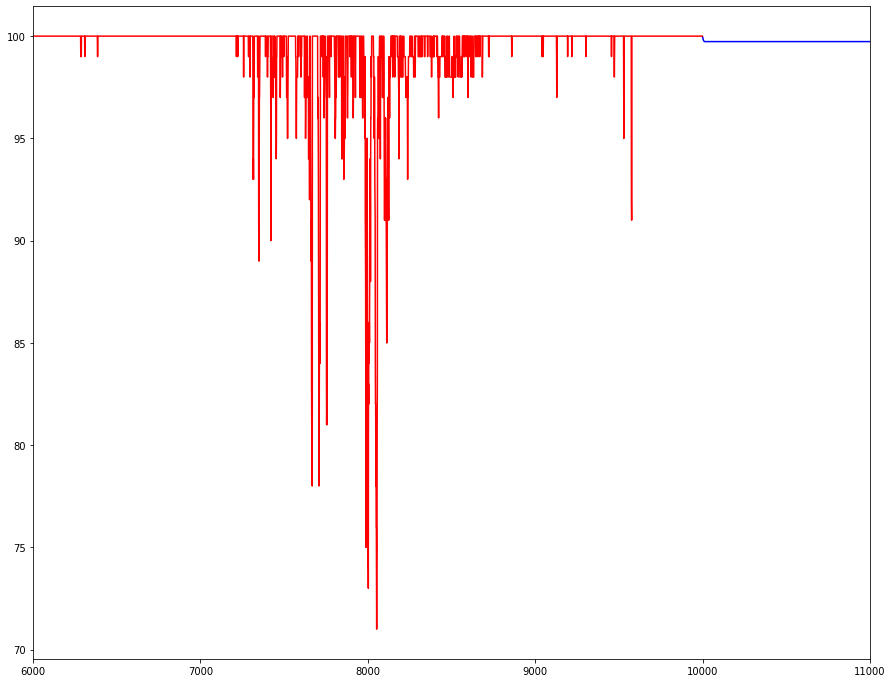

<Figure size 64800x36000 with 0 Axes>

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
plt.xlim(6000,11001)
plt.plot(model_fit.forecast(1000),color='blue')
plt.plot(df.iloc[3],color='red')
plt.figure(figsize=(900,500))

## 250 Patients

In [4]:
#40min run, 2433s
mae_list = []
i=1
while i<251:
    model = ARIMA(df.iloc[i].transpose(),order=(0,0,12))
    model_fit = model.fit()
    mae_err = model_fit.mae
    mae_list.append(mae_err)
    i=i+1

/home/suttoshe/miniconda3/envs/musc39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/suttoshe/miniconda3/envs/musc39/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/suttoshe/miniconda3/envs/musc39/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/suttoshe/miniconda3/envs/musc39/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fa

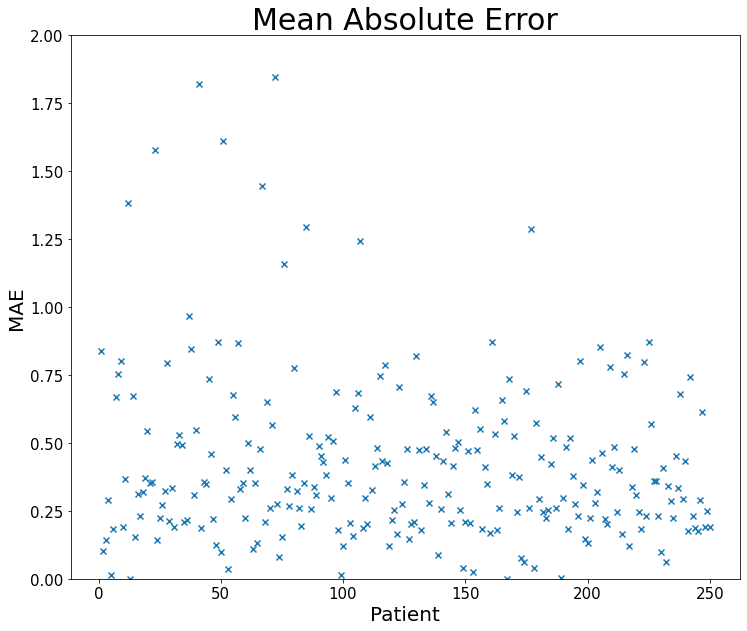

In [37]:
xmae = list(range(1,251))
plt.figure(figsize=(12,10))
plt.ylim(0,2)
plt.title('Mean Absolute Error',fontsize=30)
plt.xlabel('Patient',fontsize=20)
plt.ylabel('MAE',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(xmae,mae_list,marker='x')

In [ ]:
#find the maximum mae of the patients
max(mae_list)

NameError: name 'mae_list' is not defined

In [5]:
model_fit.forecast(100)

10000    99.797775
10001    99.615604
10002    99.450637
10003    99.301006
10004    99.158105
           ...    
10095    98.364886
10096    98.364886
10097    98.364886
10098    98.364886
10099    98.364886
Name: predicted_mean, Length: 100, dtype: float64

<Figure size 64800x36000 with 0 Axes>

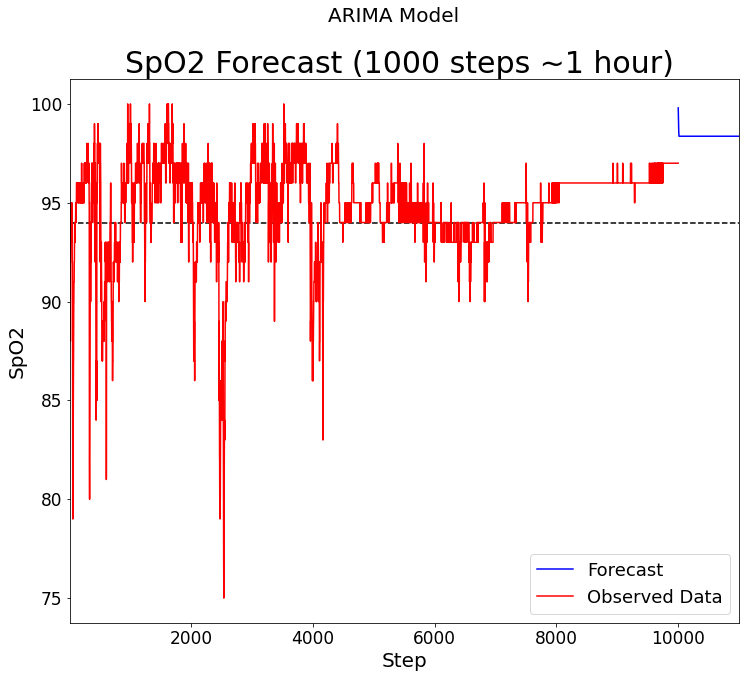

<Figure size 64800x36000 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.title('SpO2 Forecast (1000 steps ~1 hour) ',fontsize=30)
plt.suptitle('ARIMA Model',fontsize=20)
plt.xlabel('Step',fontsize=20)
plt.ylabel('SpO2',fontsize=20)
plt.xlim(1,11001)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.plot(model_fit.forecast(1000),color='blue',label='Forecast')
plt.axhline(y=94, color='black', linestyle='--')
plt.plot(df.iloc[251],color='red',label='Observed Data')
plt.legend(fontsize=18)
plt.figure(figsize=(900,500))